Accenture Stock Price - All Time

-------------------

# Análisis de Datos de Accenture Stock Price
Este proyecto analiza datos históricos de las acciones de Accenture y métricas financieras. Usaremos SQL Server para almacenar los datos, Python para la limpieza y análisis de datos, y Power BI para la visualización.

El Data Set fue descargado de Kaggle.com.

## Objetivos
- Almacenar los datos en SQL Server
- Limpiar y transformar datos en Python
- Realizar análisis exploratorio
- Visualizar KPIs y métricas financieras


-----------------------------

Luego de descargar los archivos .CSV llamados Accenture_sotck_history.csv y Accenture_stock_info.csv, creé la base de datos Accenture_Stock_Analysis.

Creé tablas para almacenar cada CSV y definí los tipos de datos.

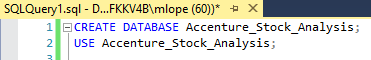

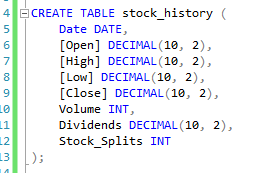

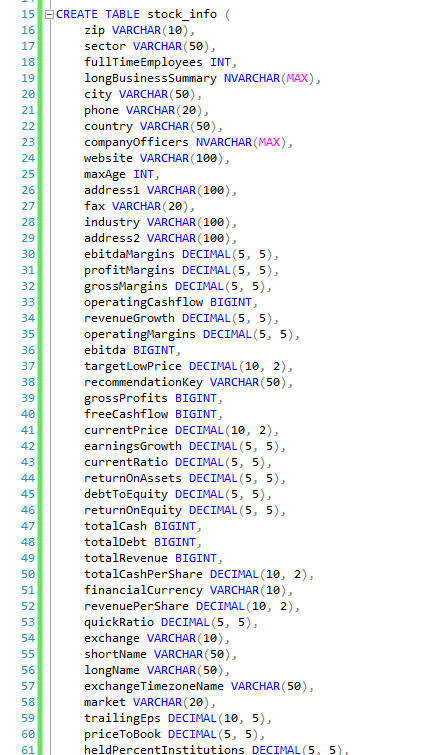

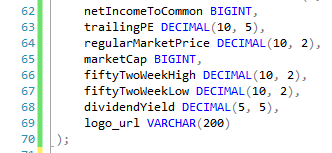

Luego conecté Python a SQL:

Almacenamiento de Datos en SQL Server

In [1]:
import pyodbc
import pandas as pd

# Configurar la conexión
connection_string = (
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=DESKTOP-UFKKV4B\SQLEXPRESS;"
    r"DATABASE=Accenture_Stock_Analysis;"
    r"Trusted_Connection=yes;"
)

# Conectar a SQL Server
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()
print("Conexión exitosa a SQL Server")


Conexión exitosa a SQL Server


In [7]:
# Verificar nombres de columnas
print(stock_info_df.columns)


Index(['zip', '2'], dtype='object')


(No hace falta crear las tablas desde Python ya que han sido creadas previamente desde SQL Server, lo mismo que la Base de Datos, Accenture_Stock_Analysis)

Carga de los Datos desde los CSV en las Tablas en SQL Server con Python:

In [9]:
stock_history_df = pd.read_csv(r"C:\Users\mlope\OneDrive\Escritorio\MLopezCastro\Accenture Stock Price - All Time\Accenture_stock_history.csv")
stock_info_df = pd.read_csv(r"C:\Users\mlope\OneDrive\Escritorio\MLopezCastro\Accenture Stock Price - All Time\Accenture_stock_info.csv")


Inserto los Datos en las Tablas Existentes: Aquí usamos un bucle for para iterar sobre los DataFrames e insertar cada fila en las tablas correspondientes:

In [13]:
print(stock_info_df.columns)


Index(['zip', '2'], dtype='object')


In [14]:
# Intentar cargar el archivo especificando el delimitador correcto (si es necesario)
stock_info_df = pd.read_csv(r"C:\Users\mlope\OneDrive\Escritorio\MLopezCastro\Accenture Stock Price - All Time\Accenture_stock_info.csv", delimiter=',')  # Cambia ',' a ';' si el archivo usa punto y coma

# Mostrar las primeras filas y los nombres de las columnas para ver cómo se cargaron
print("Columnas de stock_info_df:", stock_info_df.columns)
print(stock_info_df.head())


Columnas de stock_info_df: Index(['zip', '2'], dtype='object')
                   zip                                                  2
0               sector                                         Technology
1    fullTimeEmployees                                             624000
2  longBusinessSummary  Accenture plc, a professional services company...
3                 city                                             Dublin
4                phone                                     353 1 646 2000


-------------------------

Me surgió un problema ya que los datos de Accenture_stock_info.csv parecen estar organizados en filas en lugar de columnas; es decir, cada fila representa un atributo diferente en lugar de que cada columna represente un campo o atributo. Esto puede suceder si el archivo no está estructurado como una tabla estándar con filas para cada registro y una fila de encabezado para los nombres de columna.

Dado esto, la solución que encontré para reorganizar los datos y convertir este archivo en un formato estándar de DataFrame, con cada atributo como columna y cada fila como un registro separado fue ésta:

¨Transponer el DataFrame: usando .T, lo que cambiará filas en columnas y viceversa, para que los datos queden correctamente estructurados.¨

¨Reintentar cargar y organizar el DataFrame: Después de transponer, puedes establecer la primera fila como los nombres de columna.¨

In [16]:
# Cargar el archivo CSV original
stock_info_df = pd.read_csv(r"C:\Users\mlope\OneDrive\Escritorio\MLopezCastro\Accenture Stock Price - All Time\Accenture_stock_info.csv", header=None)

# Transponer el DataFrame para cambiar filas por columnas
stock_info_df = stock_info_df.T

# Configurar la primera fila como los nombres de las columnas
stock_info_df.columns = stock_info_df.iloc[0]
stock_info_df = stock_info_df.drop(0)  # Eliminar la primera fila que ahora es redundante

# Verificar la estructura de los datos
print("Columnas de stock_info_df después de la transposición:", stock_info_df.columns)
print(stock_info_df.head())


Columnas de stock_info_df después de la transposición: Index(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city',
       'phone', 'country', 'companyOfficers', 'website', 'maxAge',
       ...
       'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid',
       'tradeable', 'dividendYield', 'bidSize', 'dayHigh',
       'regularMarketPrice', 'logo_url'],
      dtype='object', name=0, length=152)
0 zip      sector fullTimeEmployees  \
1   2  Technology            624000   

0                                longBusinessSummary    city           phone  \
1  Accenture plc, a professional services company...  Dublin  353 1 646 2000   

0  country companyOfficers                   website maxAge  ... fromCurrency  \
1  Ireland              []  http://www.accenture.com      1  ...          NaN   

0 fiveYearAvgDividendYield fiftyTwoWeekLow bid tradeable dividendYield  \
1                     1.58          212.45   0     False         0.012   

0 bidSize dayHigh r

Inserté los datos en la tabla Stock_history desde el archivo .CSV:

In [18]:
# Insertar datos en las tablas existentes
# Para 'stock_history'
for index, row in stock_history_df.iterrows():
    cursor.execute(
        """
        INSERT INTO stock_history (Date, [Open], High, Low, [Close], Volume, Dividends, Stock_Splits)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """,
        row.Date, row.Open, row.High, row.Low, row.Close, row.Volume, row.Dividends, row['Stock Splits']
    )


# Confirmar inserción
connection.commit()
print("Datos insertados exitosamente")


Datos insertados exitosamente


Realicé una exploración inicial de los primeros registros de la tabla Stock_history desde Python:

In [19]:
query = "SELECT TOP 5 * FROM stock_history;"
stock_history_preview = pd.read_sql(query, connection)
print(stock_history_preview)


         Date   Open   High    Low  Close    Volume  Dividends  Stock_Splits
0  2001-07-19  11.23  11.38  11.16  11.29  34994300        0.0             0
1  2001-07-20  11.20  11.20  11.01  11.17   9238500        0.0             0
2  2001-07-23  11.16  11.17  10.82  11.16   7501000        0.0             0
3  2001-07-24  11.12  11.14  10.94  11.06   3537300        0.0             0
4  2001-07-25  10.94  11.12  10.90  11.12   4208100        0.0             0


C:\Users\mlope\AppData\Local\Temp\ipykernel_14688\2009376491.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock_history_preview = pd.read_sql(query, connection)


Confirmo que ambas tablas tienen cargados su datos desde los archivos .CSV y utilizando Python. Puedo comprobarlo desde SQL Server también:

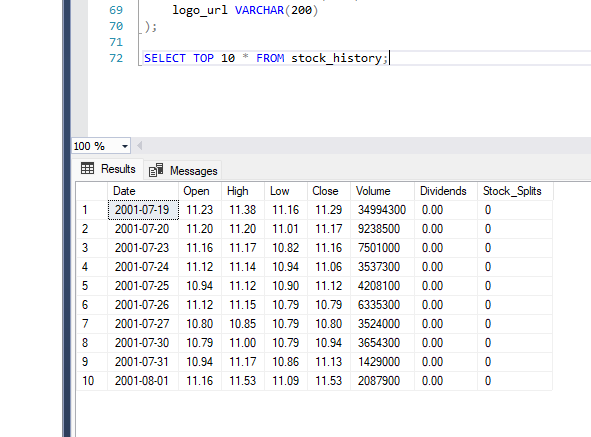

----------

Ahora que los datos están listos en SQL Server, hago un análisis exploratorio de datos (EDA) usando Python para detectar patrones y preparar los datos y algunas transformaciones de datos (ETL):

Paso 1: Importar bibliotecas y configurar la conexión

In [20]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la conexión
connection_string = (
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=DESKTOP-UFKKV4B\SQLEXPRESS;"
    r"DATABASE=Accenture_Stock_Analysis;"
    r"Trusted_Connection=yes;"
)
connection = pyodbc.connect(connection_string)
print("Conexión exitosa a SQL Server")


Conexión exitosa a SQL Server


Paso 2: Cargar datos en DataFrames de Pandas

In [21]:
# Cargar las tablas desde SQL a pandas
stock_history_df = pd.read_sql("SELECT * FROM stock_history", connection)
stock_info_df = pd.read_sql("SELECT * FROM stock_info", connection)

# Verificar primeras filas
print(stock_history_df.head())
print(stock_info_df.head())


C:\Users\mlope\AppData\Local\Temp\ipykernel_14688\395041034.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock_history_df = pd.read_sql("SELECT * FROM stock_history", connection)


         Date   Open   High    Low  Close    Volume  Dividends  Stock_Splits
0  2001-07-19  11.23  11.38  11.16  11.29  34994300        0.0             0
1  2001-07-20  11.20  11.20  11.01  11.17   9238500        0.0             0
2  2001-07-23  11.16  11.17  10.82  11.16   7501000        0.0             0
3  2001-07-24  11.12  11.14  10.94  11.06   3537300        0.0             0
4  2001-07-25  10.94  11.12  10.90  11.12   4208100        0.0             0
Empty DataFrame
Columns: [zip, sector, fullTimeEmployees, longBusinessSummary, city, phone, country, companyOfficers, website, maxAge, address1, fax, industry, address2, ebitdaMargins, profitMargins, grossMargins, operatingCashflow, revenueGrowth, operatingMargins, ebitda, targetLowPrice, recommendationKey, grossProfits, freeCashflow, currentPrice, earningsGrowth, currentRatio, returnOnAssets, debtToEquity, returnOnEquity, totalCash, totalDebt, totalRevenue, totalCashPerShare, financialCurrency, revenuePerShare, quickRatio, exchange

C:\Users\mlope\AppData\Local\Temp\ipykernel_14688\395041034.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock_info_df = pd.read_sql("SELECT * FROM stock_info", connection)


Paso 3: Análisis exploratorio básico (EDA)

Estadísticas Descriptivas:

In [22]:
# Estadísticas descriptivas para la tabla stock_history
print("Estadísticas descriptivas de stock_history:")
print(stock_history_df.describe())

# Para stock_info
print("Estadísticas descriptivas de stock_info:")
print(stock_info_df.describe(include='all'))


Estadísticas descriptivas de stock_history:
               Open          High           Low         Close        Volume  \
count  20328.000000  20328.000000  20328.000000  20328.000000  2.032800e+04   
mean      74.854933     75.536616     74.214868     74.918091  2.954039e+06   
std       70.929468     71.457769     70.416958     70.947855  2.608301e+06   
min        8.480000      9.120000      8.410000      8.820000  1.811000e+05   
25%       22.230000     22.630000     21.950000     22.350000  1.815600e+06   
50%       45.825000     46.410000     45.420000     45.790000  2.428350e+06   
75%      106.990000    107.690000    106.470000    107.040000  3.454900e+06   
max      345.000000    345.520000    341.500000    344.430000  8.965590e+07   

          Dividends  Stock_Splits  
count  20328.000000       20328.0  
mean       0.005392           0.0  
std        0.072155           0.0  
min        0.000000           0.0  
25%        0.000000           0.0  
50%        0.000000         

Distribución de Valores


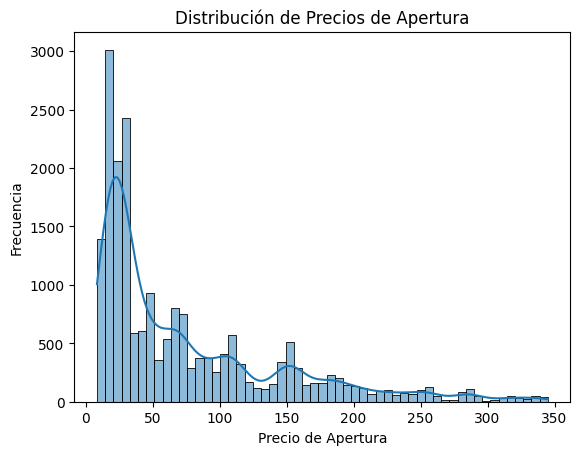

In [23]:
# Visualizar la distribución de precios de apertura
sns.histplot(stock_history_df['Open'], kde=True)
plt.title('Distribución de Precios de Apertura')
plt.xlabel('Precio de Apertura')
plt.ylabel('Frecuencia')
plt.show()


Análisis de Relaciones entre Variables

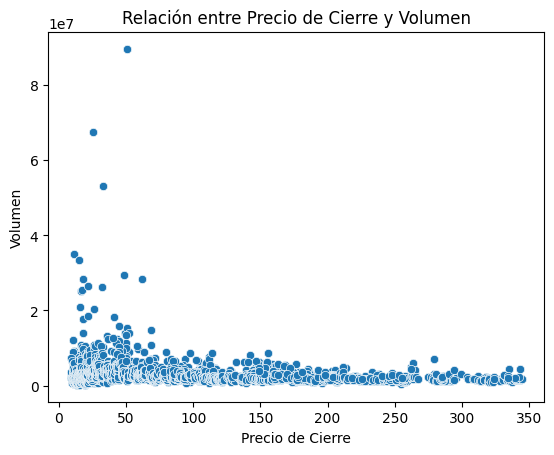

In [24]:
# Gráfico de dispersión entre precio de cierre y volumen
sns.scatterplot(data=stock_history_df, x='Close', y='Volume')
plt.title('Relación entre Precio de Cierre y Volumen')
plt.xlabel('Precio de Cierre')
plt.ylabel('Volumen')
plt.show()


Paso 4: Transformaciones de datos (ETL)

Creación de nuevas columnas

Retorno diario de la acción: Calcular el cambio porcentual diario en los precios de cierre.

In [25]:
stock_history_df['Daily_Return'] = stock_history_df['Close'].pct_change()


Media móvil de precios: Calcular la media móvil de los precios de cierre (por ejemplo, 30 días).

In [26]:
stock_history_df['Close_30D_MA'] = stock_history_df['Close'].rolling(window=30).mean()


Clasificación del sector: Agrupar y contar cuántas acciones pertenecen a cada sector en stock_info.

In [27]:
sector_counts = stock_info_df['sector'].value_counts()
print("Número de acciones por sector:")
print(sector_counts)


Número de acciones por sector:
Series([], Name: count, dtype: int64)


Paso 5: Guardar transformaciones en SQL

Para ello debo instalar primero SQLAlchemy y pyodbc desde la Terminal.

In [30]:
from sqlalchemy import create_engine
import pandas as pd

# Cadena de conexión usando SQLAlchemy y pyodbc
engine = create_engine("mssql+pyodbc://DESKTOP-UFKKV4B\\SQLEXPRESS/Accenture_Stock_Analysis?driver=ODBC+Driver+17+for+SQL+Server")

# Cargar el DataFrame a SQL Server
stock_history_df.to_sql('stock_history_transformed', con=engine, if_exists='replace', index=False)
print("Datos cargados exitosamente.")


Datos cargados exitosamente.


Paso 6: Análisis de correlación

Para verificar la relación entre distintas variables:

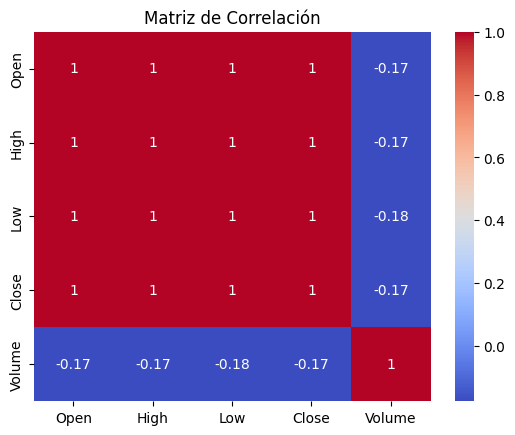

In [31]:
# Matriz de correlación
correlation_matrix = stock_history_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


1. Exploración de Datos Básica

Analiza las primeras filas y el tipo de datos.

In [33]:
# Visualiza las primeras filas
print(stock_history_df.head())
print(stock_info_df.head())

# Información general de cada dataframe
print(stock_history_df.info())
print(stock_info_df.info())


         Date   Open   High    Low  Close    Volume  Dividends  Stock_Splits  \
0  2001-07-19  11.23  11.38  11.16  11.29  34994300        0.0             0   
1  2001-07-20  11.20  11.20  11.01  11.17   9238500        0.0             0   
2  2001-07-23  11.16  11.17  10.82  11.16   7501000        0.0             0   
3  2001-07-24  11.12  11.14  10.94  11.06   3537300        0.0             0   
4  2001-07-25  10.94  11.12  10.90  11.12   4208100        0.0             0   

   Daily_Return  Close_30D_MA  
0           NaN           NaN  
1     -0.010629           NaN  
2     -0.000895           NaN  
3     -0.008961           NaN  
4      0.005425           NaN  
Empty DataFrame
Columns: [zip, sector, fullTimeEmployees, longBusinessSummary, city, phone, country, companyOfficers, website, maxAge, address1, fax, industry, address2, ebitdaMargins, profitMargins, grossMargins, operatingCashflow, revenueGrowth, operatingMargins, ebitda, targetLowPrice, recommendationKey, grossProfits, free

2. Estadísticas Descriptivas

Genera estadísticas para las variables numéricas y categóricas.


In [36]:
# Estadísticas descriptivas para variables numéricas
print(stock_history_df.describe())

# Para variables categóricas
print(stock_info_df.describe(include='object'))


               Open          High           Low         Close        Volume  \
count  20328.000000  20328.000000  20328.000000  20328.000000  2.032800e+04   
mean      74.854933     75.536616     74.214868     74.918091  2.954039e+06   
std       70.929468     71.457769     70.416958     70.947855  2.608301e+06   
min        8.480000      9.120000      8.410000      8.820000  1.811000e+05   
25%       22.230000     22.630000     21.950000     22.350000  1.815600e+06   
50%       45.825000     46.410000     45.420000     45.790000  2.428350e+06   
75%      106.990000    107.690000    106.470000    107.040000  3.454900e+06   
max      345.000000    345.520000    341.500000    344.430000  8.965590e+07   

          Dividends  Stock_Splits  Daily_Return  Close_30D_MA  
count  20328.000000       20328.0  20327.000000  20299.000000  
mean       0.005392           0.0      0.000698     74.776940  
std        0.072155           0.0      0.022301     70.013604  
min        0.000000           0.

Distribución y Detección de Valores Atípicos

Usa histogramas y boxplots para ver la distribución de precios y volúmenes de las acciones.

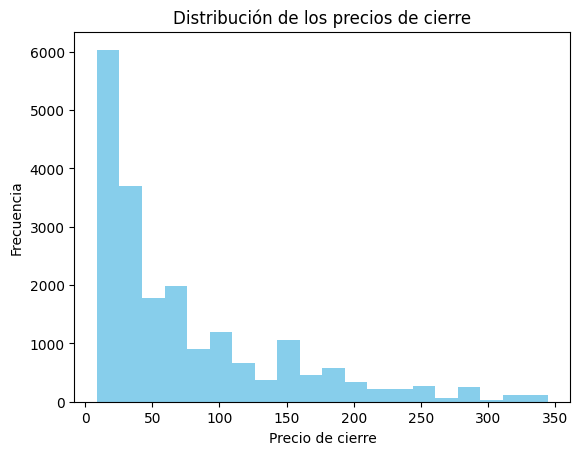

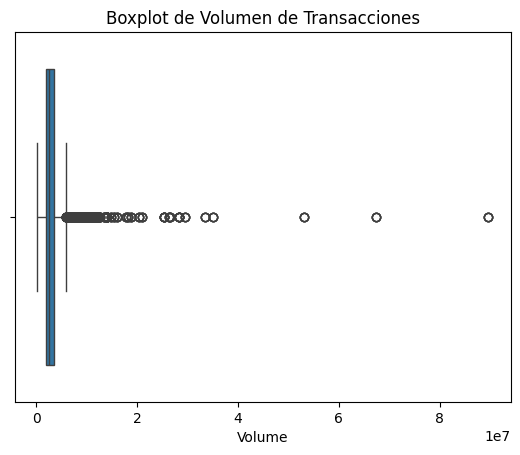

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la variable 'Close'
plt.hist(stock_history_df['Close'], bins=20, color='skyblue')
plt.title('Distribución de los precios de cierre')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para detectar valores atípicos en volumen
sns.boxplot(data=stock_history_df, x='Volume')
plt.title('Boxplot de Volumen de Transacciones')
plt.show()


Transformación de Fechas y Creación de Nuevas Variables

Observa las tendencias de los precios de las acciones a lo largo del tiempo.

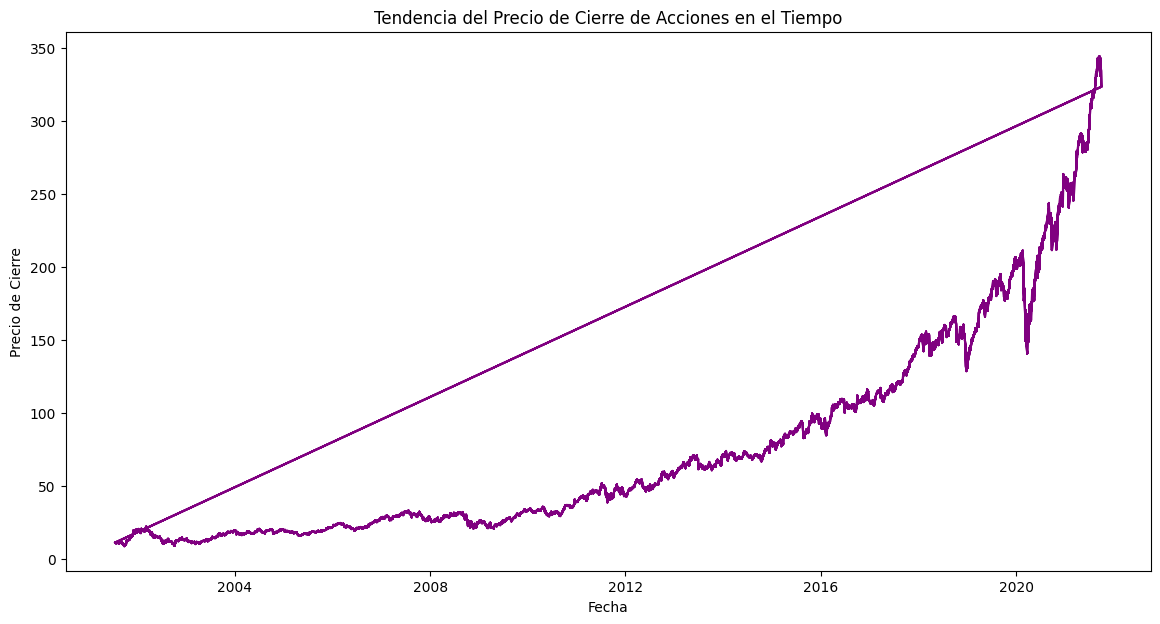

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(stock_history_df['Date'], stock_history_df['Close'], color='purple')
plt.title('Tendencia del Precio de Cierre de Acciones en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.show()


6. Análisis de Correlación

Examina la relación entre variables como precios de cierre y volumen.

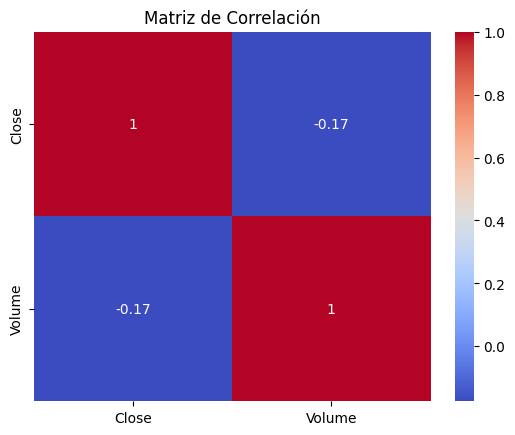

In [38]:
correlation = stock_history_df[['Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


--------------

Conexión con Power BI:

Desde Power BI Desktop,

Seleccioné la opción Obtener datos (Get Data) en la barra de herramientas superior y elegí SQL Server.

En la ventana de conexión, ingresé el nombre de mi servidor y el nombre de la base de datos (Accenture_Stock_Analysis).

Seleccioné las tablas stock_history, stock_history_transformed y stock_info para cargar. 

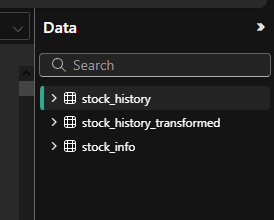

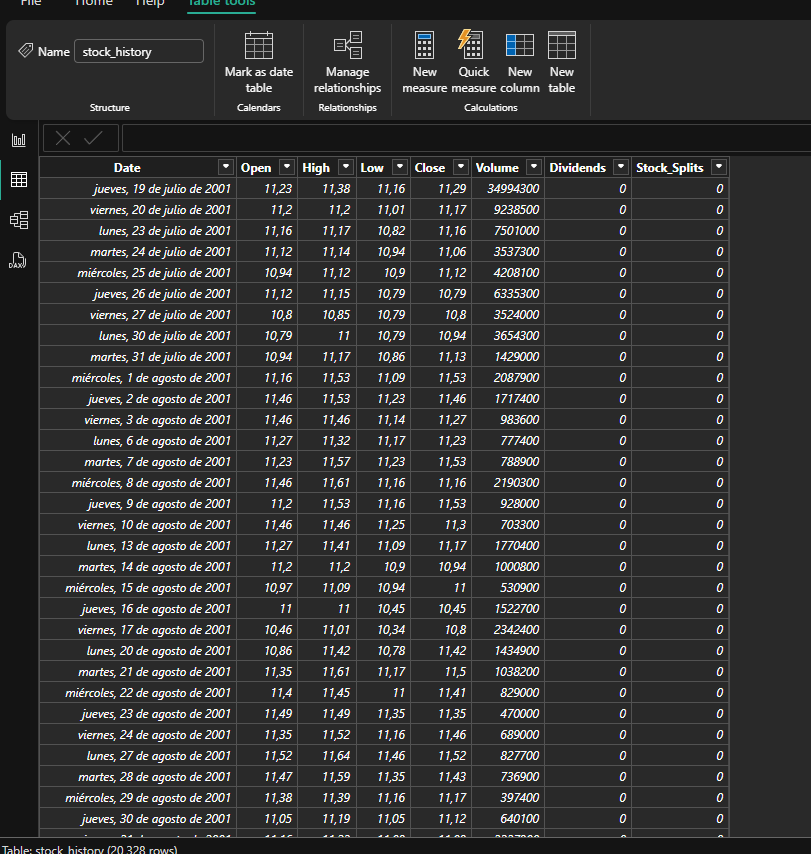

Agregado de columnas en Date (hierarquía de Year, Quarter, Month y Day):

Para agregar columnas de periodos (Año, Mes, Trimestre) en Python, hice uso de Pandas:

In [41]:
import pandas as pd

# Me aseguro de que la columna Date esté en formato de fecha
stock_history_df['Date'] = pd.to_datetime(stock_history_df['Date'])

# Agrego columnas de Año, Mes y Trimestre
stock_history_df['Año'] = stock_history_df['Date'].dt.year
stock_history_df['Mes'] = stock_history_df['Date'].dt.month
stock_history_df['Trimestre'] = stock_history_df['Date'].dt.quarter

# Opcional: para ver los primeros registros y confirmar los cambios
print(stock_history_df[['Date', 'Año', 'Mes', 'Trimestre']].head())


        Date   Año  Mes  Trimestre
0 2001-07-19  2001    7          3
1 2001-07-20  2001    7          3
2 2001-07-23  2001    7          3
3 2001-07-24  2001    7          3
4 2001-07-25  2001    7          3


Explicación del Código:

pd.to_datetime(stock_history_df['Date']): 

Convierte la columna Date a formato de fecha, lo cual es esencial para usar las propiedades de fechas.

.dt.year, .dt.month, y .dt.quarter: 

Extraen el Año, Mes, y Trimestre, respectivamente, y los agregan como nuevas columnas al dataframe.

Estas nuevas columnas me permitirán agrupar y analizar los datos por períodos específicos en Python y también en Power BI.

----

Creación de nuevas columnas en Power BI

Precio promedio diario: (High + Low) / 2:

Precio Promedio Diario = (stock_history[High] + stock_history[Low]) / 2

Rendimiento diario: (Close - Open) / Open * 100:

Rendimiento Diario (%) = ROUND((stock_history[Close] - stock_history[Open]) / stock_history[Open] * 100, 3)

-----------

Creación de Medidas utilizando DAX:

1. Promedio de precio de apertura y cierre mensual o trimestral:

Creo una medida para calcular el promedio mensual de los precios de apertura (Open):

Promedio_Apertura_Mensual = 

CALCULATE(

    AVERAGE(stock_history[Open]),

    ALLEXCEPT(DateTable, DateTable[Year], DateTable[Month])

)


2. Promedio de Cierre Mensual:

Promedio_Cierre_Mensual = 

CALCULATE(

    AVERAGE(stock_history[Close]),

    ALLEXCEPT(DateTable, DateTable[Year], DateTable[Month])

)


3. Promedio de Apertura Trimestral:

Promedio_Apertura_Trimestral = 

CALCULATE(

    AVERAGE(stock_history[Open]),

    ALLEXCEPT(DateTable, DateTable[Year], DateTable[Quarter])

)


4. Promedio de Cierre Trimestral:


Promedio_Cierre_Trimestral = 

CALCULATE(

    AVERAGE(stock_history[Close]),

    ALLEXCEPT(DateTable, DateTable[Year], DateTable[Quarter])

)


5. Variación Porcentual del Cierre Mensual:


Variacion_Porcentual_Mensual = 

VAR Cierre_Anterior = 

    CALCULATE(

        AVERAGE(stock_history[Close]),

        DATEADD(DateTable[Date], -1, MONTH)  -- Obtiene el cierre del mes anterior

    )

VAR Cierre_Actual = AVERAGE(stock_history[Close])

RETURN

    IF(

        NOT(ISBLANK(Cierre_Anterior)),

        (Cierre_Actual - Cierre_Anterior) / Cierre_Anterior * 100,

        BLANK()

    )

6. Promedio Mensual de Volumen:


Promedio_Volumen_Mensual = 

CALCULATE(

    AVERAGE(stock_history[Volume]),

    ALLEXCEPT(DateTable, DateTable[Year], DateTable[Month])

)


7. Promedio Anual de Volumen:

Promedio_Volumen_Anual = 

CALCULATE(

    AVERAGE(stock_history[Volume]),

    ALLEXCEPT(DateTable, DateTable[Year])

)


8. Máximo Precio Histórico:

Max_Precio_Historico = 

MAX(stock_history[Close])


9. Mínimo Precio Histórico:

Min_Precio_Historico = 

MIN(stock_history[Close])


----

Pasos adicionales:
Aplicar estas métricas en Power BI:

Después de crear estas medidas en Power BI (en el panel de medidas), puedes arrastrarlas a tus visualizaciones (como gráficos de líneas, tarjetas, o tablas).
Estas medidas pueden ser útiles en tarjetas de KPI o gráficos de barras para comparar la evolución de las métricas a lo largo del tiempo.
Mostrar KPIs en tu Dashboard:

Crea un dashboard usando las métricas como Promedio de cierre mensual, Variación porcentual mensual, Promedio de volumen y otras.
Utiliza tarjetas de KPI, gráficos de barras o líneas y filtros interactivos para visualizar cómo estas métricas cambian con el tiempo.